In [3]:
!pip install prophet pmdarima openpyxl scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 2.2 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/13.3 MB 1.7 MB/s eta 0:00:08
   --- ------------------------------------ 1.3/13.3 MB 1.6 MB/s eta 0:00:08
   ---- ----------------------------------- 1.6/13.3 MB 1.6 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/13.3 MB 1.7 MB/s eta 0:00:07
   ------- -------------------------------- 2.4/13.3 MB 1.7 MB/s eta 0:00:07
   ------- -------------------------------- 2.6/13.3 MB 1.7 MB/s eta 0:00:07
   -------- ------------------------------- 2.9/13.3 MB 1.6 MB/s eta 0:00:07
   --------- ------------------------------ 3.1/13.3 MB 1.6 MB/s eta 0:00:07
   ----------- ---------------------------- 3.7/13.3 MB 1.6 MB/s eta 0:00:07
   ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


C:\Users\DELL\AppData\Local\Temp\ipykernel_34288\3735636324.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('ds').resample('M').sum().reset_index()


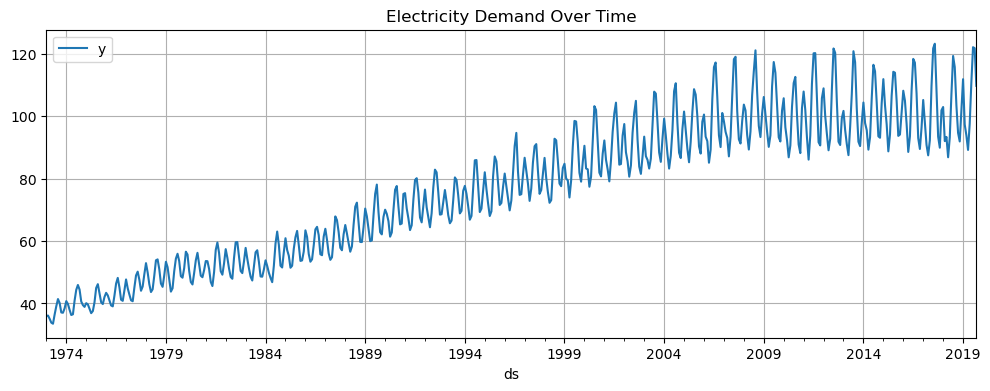

09:04:30 - cmdstanpy - INFO - Chain [1] start processing
09:04:34 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


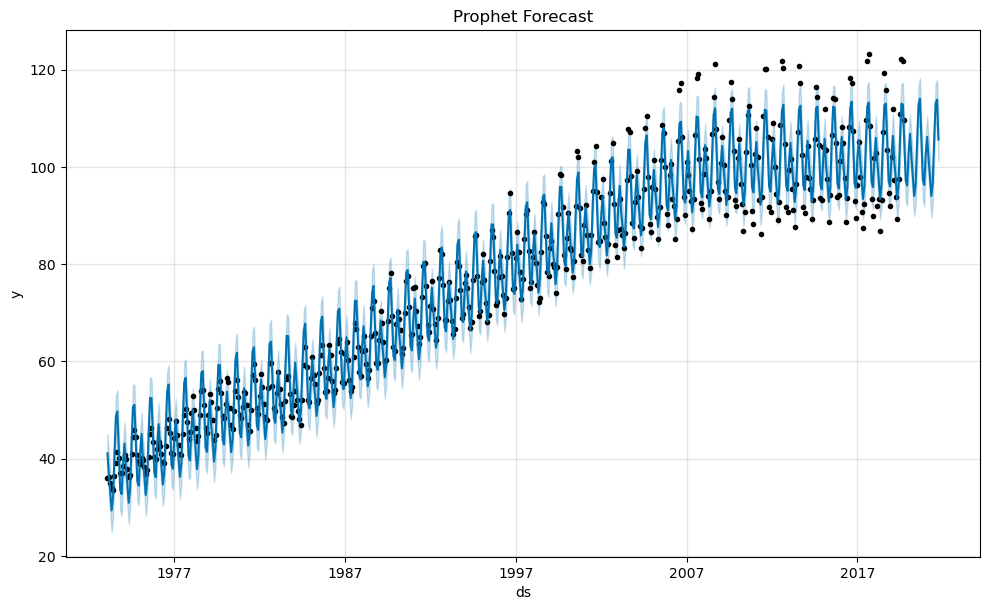

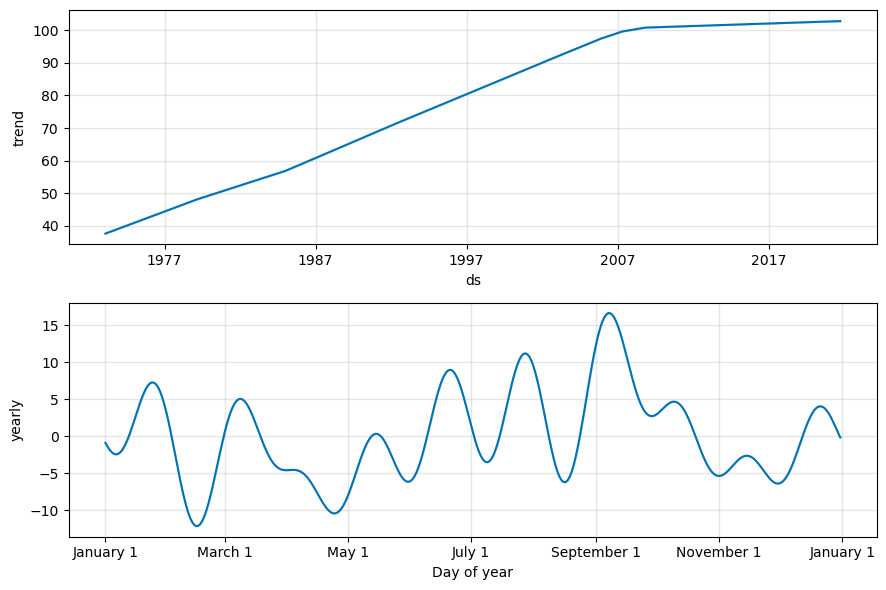

Prophet Metrics (last 24 months):
{'RMSE': 4.9265735784075675, 'MAPE': 4.169868760173482, 'RMSPE': 4.801642207922131}
Forecast saved to Excel.


In [6]:
# Cell 2 - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
#python
#Copy
#Edit
# Cell 3 - Load and Prepare Data
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\assignment\Electricity Consumption.csv")
df.columns = [col.strip().lower() for col in df.columns]
date_col = [col for col in df.columns if 'date' in col or 'month' in col][0]
value_col = [col for col in df.columns if col != date_col][0]

df[date_col] = pd.to_datetime(df[date_col])
df = df[[date_col, value_col]]
df.columns = ['ds', 'y']
df = df.set_index('ds').resample('M').sum().reset_index()

df.plot(x='ds', y='y', title='Electricity Demand Over Time', figsize=(12,4))
plt.grid(True)
plt.show()
#python
#Copy
#Edit
# Cell 4 - Prophet Forecast
prophet = Prophet(seasonality_mode='additive', yearly_seasonality=True)
prophet.fit(df)

future = prophet.make_future_dataframe(periods=24, freq='M')
forecast = prophet.predict(future)

fig1 = prophet.plot(forecast)
plt.title("Prophet Forecast")
plt.grid(True)
plt.show()

fig2 = prophet.plot_components(forecast)
plt.show()
#python
#Copy
#Edit
# Cell 5 - Prophet Evaluation Metrics
df_merged = df.merge(forecast[['ds', 'yhat']], on='ds', how='left')
df_merged['error'] = df_merged['y'] - df_merged['yhat']

def get_metrics(true, pred):
    rmse = sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    rmspe = np.sqrt(np.mean(np.square((true - pred) / true))) * 100
    return {"RMSE": rmse, "MAPE": mape, "RMSPE": rmspe}

valid = df_merged.dropna().iloc[-24:]
metrics_prophet = get_metrics(valid['y'], valid['yhat'])
print("Prophet Metrics (last 24 months):")
print(metrics_prophet)
#python
#Copy
#Edit
# Cell 6 - Export Prophet Forecast
forecast_future = forecast[forecast['ds'] > df['ds'].max()][['ds', 'yhat']]
forecast_future.columns = ['Month', 'Forecast']
forecast_future.to_excel("Prophet_Electricity_Forecast_24_Months.xlsx", index=False)
print("Forecast saved to Excel.")
#python
#Copy
#Edit
# Cell 7 - (Optional) ARIMA/SARIMA Comparison

# train = df.iloc[:-24]
# test = df.iloc[-24:]

# model_arima = auto_arima(train['y'], seasonal=False, stepwise=True, trace=True)
# forecast_arima = model_arima.predict(n_periods=24)
# metrics_arima = get_metrics(test['y'].values, forecast_arima)

# sarima_model = SARIMAX(train['y'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
# forecast_sarima = sarima_model.forecast(steps=24)
# metrics_sarima = get_metrics(test['y'].values, forecast_sarima)

# print("ARIMA Metrics:", metrics_arima)
# print("SARIMA Metrics:", metrics_sarima)